In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack

import warnings
warnings.filterwarnings("ignore")

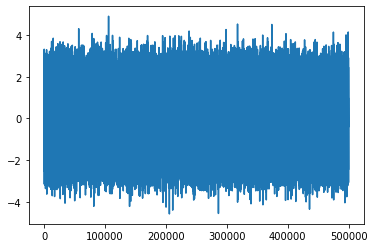

In [2]:
mean = 0
std = 1
num_samples = 500000
white_noise = np.random.normal(mean, std, size=num_samples)
plt.plot(white_noise)

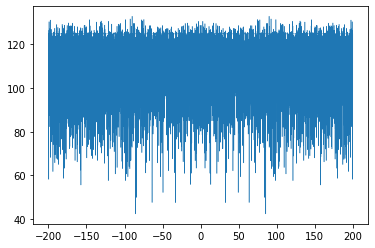

In [3]:
fs =10000
white_noise_fft = np.fft.fft(white_noise)
white_noise_psd = np.abs(white_noise_fft) ** 2
white_noise_fftfreq = np.fft.fftfreq(len(white_noise_psd),1/fs)
i = abs(white_noise_fftfreq) < 200
plt.plot(white_noise_fftfreq[i], 20*np.log10(white_noise_psd[i]), linewidth=.5)

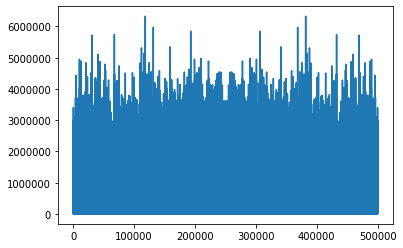

In [4]:
plt.plot(white_noise_psd)

In [5]:
f = 50 / 10000
t = np.array([i for i in range(num_samples)])
b = 0
manual_noise = np.sin(2 * np.pi * f * t + b) * 0.1

In [6]:
scale_first_half = [1/i for i in range(1, int(len(white_noise_fft)/2 + 1))]
scale_second_half = scale_first_half[::-1]
scale = scale_first_half + scale_second_half

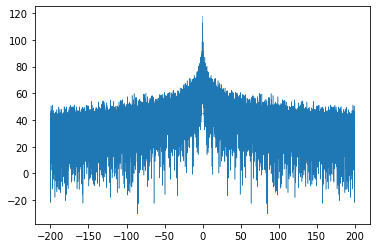

In [7]:
pink_noise_freq = white_noise_fft * np.sqrt(scale)
pink_noise_psd = np.abs(pink_noise_freq) ** 2
pink_noise_fftfreq = np.fft.fftfreq(len(pink_noise_psd),1/fs)
i = abs(pink_noise_fftfreq) < 200
plt.plot(pink_noise_fftfreq[i], 20*np.log10(pink_noise_psd[i]), linewidth=.5)

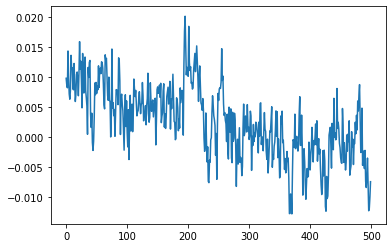

In [8]:
pink_noise = np.fft.ifft(pink_noise_freq)
plt.plot(pink_noise[:500])

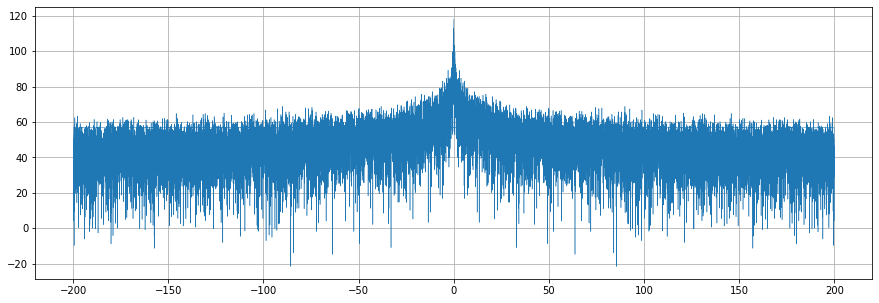

In [9]:
fig = plt.figure(figsize=(15,5))

fs=10000
fft = np.fft.fft(pink_noise+white_noise*0.01)
psd = np.abs(fft) ** 2
fftfreq = np.fft.fftfreq(len(psd),1/fs)

i = abs(fftfreq) < 200
plt.grid()
plt.plot(fftfreq[i], 20*np.log10(psd[i]), linewidth=.5)

plt.show()
